In [90]:
# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

from sklearn.utils.multiclass import unique_labels


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from PIL import Image
import numpy as np
# For reproducibility
np.random.seed(42)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.utils import np_utils, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean

## Load in data

In [91]:
#read in csv
data = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')
data.head(20)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [13]:
#check shape
data.shape

(60000, 785)

## Create X, y data frame

In [98]:
#set size of images to be scaled to
row = 28
col= 28

In [28]:
print(type(data.iloc[:, 0]))

<class 'pandas.core.series.Series'>


In [99]:
#pandas dataframe to np.array, manipulate rows so each input is reshaped to be 28 x 28
X = np.array(data.iloc[:, 1:])
y = to_categorical(np.array(data.iloc[:, 0]))

In [100]:
X = X.reshape(60_000, row, col, 1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = .30 )

print(type(X_test))

<class 'numpy.ndarray'>


In [32]:
# Make sure each value is a float. (Otherwise, we get an error.)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# The current range of X_train and X_test is 0 to 255.
# The code below is equivalent to X_train = X_train / 255.
# This scales each value to be between 0 and 1.
X_train /= 255
X_test /= 255

In [33]:
X_train.shape

(42000, 28, 28, 1)

In [34]:
X_test.shape

(18000, 28, 28, 1)

In [35]:
y_train.shape

(42000, 10)

In [36]:
#check if x_train values are arrays
type(X_train[0])

numpy.ndarray

In [37]:
#double check to make sure y values are categorical
y_train[0:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Build Convolutional Neural Net

In [64]:
#set parameters to reduce learning rate when model plateaus
reduce_lr = ReduceLROnPlateau(monitor='loss', 
                              factor=0.3, 
                              patience=3, 
                              min_lr=0.000000000001, 
                              verbose=1)

In [77]:
cnn_model = Sequential()

In [78]:
# Add a convolutional layer.
cnn_model.add(Conv2D(filters = 50,
                     kernel_size = (3,3),
                     activation = 'relu',
                     input_shape = (row, col, 1)
                    )) #2d convlutional layer

  # number of filters
  # height/width of filter
  # activation function 
  # shape of input (image)

In [79]:
# dimensions of region of pooling
#add pooling layer
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [80]:
# Add a convolutional layer with 16 filters of 
# size 3x3 and the ReLU activation function. 

cnn_model.add(Conv2D(16,
                     kernel_size=3, #keras knows this is. 3x3
                     activation='relu'))


In [81]:

cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.25))

In [82]:
# Flatten our result so that we can pass it into a dense layer.
cnn_model.add(Flatten())


In [83]:

# Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(128, 
                    activation = 'relu',
                    ))

cnn_model.add(Dropout(0.25))


In [84]:
#Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(64, 
                    activation = 'relu',
                    ))

# cnn_model.add(Dropout(0.5))

#Add a final layer with 10 neurons.
cnn_model.add(Dense(10, 
                    activation = 'softmax',
                    ))

In [85]:
# Compile model
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [86]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 50)        500       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 50)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 16)        7216      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               51328     
__________

In [87]:
# Fit model on training data
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=100,
                        verbose=1,
                        callbacks=[reduce_lr])
#                         ,
#                         callbacks=[reduce_lr])

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 20s 480us/step - loss: 1.0316 - acc: 0.6124 - val_loss: 0.5641 - val_acc: 0.7772
Epoch 2/100
42000/42000 [==============================] - 20s 469us/step - loss: 0.6048 - acc: 0.7700 - val_loss: 0.4853 - val_acc: 0.8098
Epoch 3/100
42000/42000 [==============================] - 19s 462us/step - loss: 0.5407 - acc: 0.7962 - val_loss: 0.4516 - val_acc: 0.8343
Epoch 4/100
42000/42000 [==============================] - 17s 410us/step - loss: 0.4992 - acc: 0.8148 - val_loss: 0.4060 - val_acc: 0.8518
Epoch 5/100
42000/42000 [==============================] - 17s 413us/step - loss: 0.4666 - acc: 0.8284 - val_loss: 0.3880 - val_acc: 0.8538
Epoch 6/100
42000/42000 [==============================] - 17s 409us/step - loss: 0.4390 - acc: 0.8390 - val_loss: 0.3637 - val_acc: 0.8674
Epoch 7/100
42000/42000 [==============================] - 16s 388us/step - loss: 0.4236 - acc: 0.8457 - val_l

Epoch 59/100
42000/42000 [==============================] - 19s 460us/step - loss: 0.2395 - acc: 0.9097 - val_loss: 0.2409 - val_acc: 0.9118
Epoch 60/100
42000/42000 [==============================] - 18s 436us/step - loss: 0.2389 - acc: 0.9085 - val_loss: 0.2439 - val_acc: 0.9072
Epoch 61/100
42000/42000 [==============================] - 19s 450us/step - loss: 0.2383 - acc: 0.9107 - val_loss: 0.2586 - val_acc: 0.9063

Epoch 00061: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 62/100
42000/42000 [==============================] - 19s 450us/step - loss: 0.2229 - acc: 0.9170 - val_loss: 0.2346 - val_acc: 0.9145
Epoch 63/100
42000/42000 [==============================] - 17s 407us/step - loss: 0.2208 - acc: 0.9174 - val_loss: 0.2356 - val_acc: 0.9131
Epoch 64/100
42000/42000 [==============================] - 16s 389us/step - loss: 0.2221 - acc: 0.9180 - val_loss: 0.2342 - val_acc: 0.9145
Epoch 65/100
42000/42000 [==============================] - 16s 370us/ste

## Plot ROC/AUC Curve

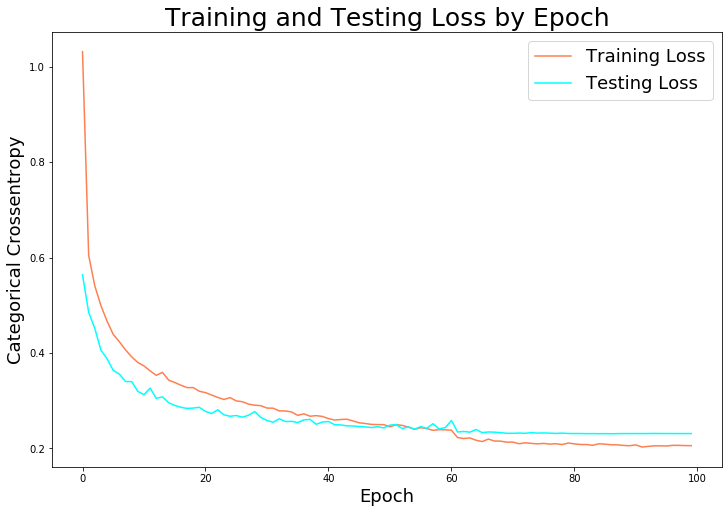

In [88]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='coral')
plt.plot(test_loss, label='Testing Loss', color='aqua')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
# plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

plt.legend(fontsize = 18);

In [48]:
y_pred = cnn_model.predict_classes(X_test)


## Scratch Work


In [104]:
corr_map = pd.DataFrame(y_pred)
corr_map.head(10)

,0
0,7
1,8
2,8
3,5
4,9
5,1
6,2
7,3
8,6
9,2


In [105]:
corr_map[0].value_counts()

4    1900
7    1871
3    1850
0    1808
2    1791
9    1785
6    1769
1    1759
8    1751
5    1716
Name: 0, dtype: int64

In [106]:
y_test.shape

(18000, 10)

In [107]:
y_pred.shape

(18000,)

In [165]:
corr_map['actual_preds'] = np.argmax(y_test, axis = 1)

In [166]:
corr_map['actual_preds'].value_counts()

6    1846
7    1841
3    1822
2    1814
4    1805
1    1795
9    1794
0    1783
8    1762
5    1738
Name: actual_preds, dtype: int64

In [169]:
confusion_matrix(y_pred, corr_map['actual_preds'])

array([[1549,    2,   20,   31,    3,    1,  196,    0,    6,    0],
       [   1, 1747,    0,    6,    2,    0,    2,    0,    1,    0],
       [  32,    0, 1561,    6,   60,    0,  129,    0,    3,    0],
       [  29,   34,   21, 1673,   54,    2,   34,    0,    3,    0],
       [   4,    4,  109,   63, 1576,    0,  141,    0,    3,    0],
       [   0,    0,    0,    0,    1, 1693,    1,   14,    2,    5],
       [ 160,    6,  102,   41,  109,    0, 1335,    0,   16,    0],
       [   0,    0,    0,    0,    0,   29,    0, 1795,    0,   47],
       [   8,    2,    1,    2,    0,    0,    8,    1, 1728,    1],
       [   0,    0,    0,    0,    0,   13,    0,   31,    0, 1741]])

In [124]:
corr_map = pd.get_dummies(corr_map, columns=['actual_preds'])
corr_map.head()

,0,actual_preds_0,actual_preds_1,actual_preds_2,actual_preds_3,actual_preds_4,actual_preds_5,actual_preds_6,actual_preds_7,actual_preds_8,actual_preds_9
0,7,0,0,0,0,0,0,0,1,0,0
1,8,0,0,0,0,0,0,0,0,1,0
2,8,0,0,0,0,0,0,0,0,1,0
3,5,0,0,0,0,0,1,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,1


In [125]:
corr_map.head()

,0,actual_preds_0,actual_preds_1,actual_preds_2,actual_preds_3,actual_preds_4,actual_preds_5,actual_preds_6,actual_preds_7,actual_preds_8,actual_preds_9
0,7,0,0,0,0,0,0,0,1,0,0
1,8,0,0,0,0,0,0,0,0,1,0
2,8,0,0,0,0,0,0,0,0,1,0
3,5,0,0,0,0,0,1,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,1


In [138]:
score = corr_map['actual_preds_0'].groupby(corr_map[0])

In [148]:
score_0 = pd.DataFrame(score)
score_0.head(10)


,0,1
0,0,11 1 15 1 23 1 27 1 28...
1,1,5 0 13 0 19 0 26 0 30...
2,2,6 0 9 0 20 0 32 0 40...
3,3,7 0 21 0 34 0 51 0 60...
4,4,35 0 38 0 46 0 47 0 62...
5,5,3 0 10 0 29 0 45 0 53...
6,6,8 0 14 0 16 0 17 0 24...
7,7,0 0 12 0 33 0 83 0 95...
8,8,1 0 2 0 22 0 39 0 54...
9,9,4 0 18 0 25 0 36 0 37...


In [155]:
score_0[1].sum().sum()

0.0

0     7
1     8
2     8
3     5
4     9
5     1
6     2
7     6
8     6
9     2
10    5
11    0
12    7
13    1
14    6
15    0
16    6
17    2
18    9
19    1
20    2
21    4
22    8
23    0
24    4
25    9
26    1
27    0
28    0
29    5
30    1
32    2
33    7
34    3
35    4
36    9
37    9
38    4
39    8
40    2
45    5
46    4
47    4
51    3
53    5
54    8
60    3
62    3
83    7
95    7
Name: actual_preds, dtype: int64

In [161]:
corr_map

,0,actual_preds_0,actual_preds_1,actual_preds_2,actual_preds_3,actual_preds_4,actual_preds_5,actual_preds_6,actual_preds_7,actual_preds_8,actual_preds_9
0,7,0,0,0,0,0,0,0,1,0,0
1,8,0,0,0,0,0,0,0,0,1,0
2,8,0,0,0,0,0,0,0,0,1,0
3,5,0,0,0,0,0,1,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,1
5,1,0,1,0,0,0,0,0,0,0,0
6,2,0,0,1,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,1,0,0,0
8,6,0,0,0,0,0,0,1,0,0,0
9,2,0,0,1,0,0,0,0,0,0,0


In [99]:
Total = corr_map.groupby[0].sum()

TypeError: 'method' object is not subscriptable

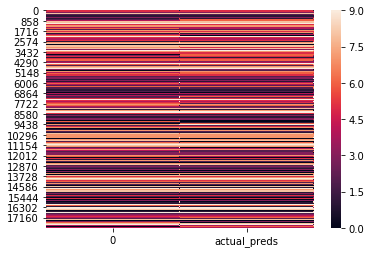

In [77]:
sns.heatmap(corr_map)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 50)        500       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        7216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               51328     
__________

In [156]:
data['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64